In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
# Filename: MGS4701_Team4_Milestone1.ipynb
# Author: Jared Sheridan, Evan Kavanagh
# Created: 2024-12-16
# Version: 1.0
# Description: 
    EDA of Dataset for MSRP Prediction Project
"""

In [1]:
print("MGS4701 Team 4")

MGS4701 Team 4


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("CarDataset_Normalized.csv")

In [4]:
unnormalized_df = pd.read_csv("CarDatasetCSV.csv")

In [5]:
unnormalized_df.describe()

Car_Age  Fuel_Type_RegularUnleaded  Fuel_Type_Premium  \
count  11914.000000               11914.000000       11914.000000   
mean      13.615662                   0.611046           0.166443   
std        7.579740                   0.487533           0.372493   
min        7.000000                   0.000000           0.000000   
25%        8.000000                   0.000000           0.000000   
50%        9.000000                   1.000000           0.000000   
75%       17.000000                   1.000000           0.000000   
max       34.000000                   1.000000           1.000000   

       Fuel_Type_FlexFuel  Fuel_Type_Diesel  Fuel_Type_NaturalGas  \
count        11914.000000      11914.000000          11914.000000   
mean             0.080242          0.012422              0.000168   
std              0.271678          0.110766              0.012956   
min              0.000000          0.000000              0.000000   
25%              0.000000          0.000000              0.000000   
50%              0.000000          0.000000              0.000000   
75%              0.000000          0.000000              0.000000   
max              1.000000          1.000000              1.000000   

       Fuel_Type_Electric    Engine_HP  Engine_Cylinders  \
count        11914.000000  11845.00000      11884.000000   
mean             0.005540    249.38607          5.628829   
std              0.074226    109.19187          1.780559   
min              0.000000     55.00000          0.000000   
25%              0.000000    170.00000          4.000000   
50%              0.000000    227.00000          6.000000   
75%              0.000000    300.00000          6.000000   
max              1.000000   1001.00000         16.000000   

       Transmission_Automatic  ...  VehicleStyle_RegularCabPickup  \
count            11914.000000  ...                   11914.000000   
mean                 0.693806  ...                       0.032902   
std                  0.460931  ...                       0.178389   
min                  0.000000  ...                       0.000000   
25%                  0.000000  ...                       0.000000   
50%                  1.000000  ...                       0.000000   
75%                  1.000000  ...                       0.000000   
max                  1.000000  ...                       1.000000   

       VehicleStyle_ExtendedCabPickup  VehicleStyle_2drSUV  \
count                    11914.000000         11914.000000   
mean                         0.052291             0.011583   
std                          0.222623             0.107004   
min                          0.000000             0.000000   
25%                          0.000000             0.000000   
50%                          0.000000             0.000000   
75%                          0.000000             0.000000   
max                          1.000000             1.000000   

       VehicleStyle_CargoVan  VehicleStyle_ConvertibleSUV  \
count           11914.000000                 11914.000000   
mean                0.007974                     0.002434   
std                 0.088943                     0.049279   
min                 0.000000                     0.000000   
25%                 0.000000                     0.000000   
50%                 0.000000                     0.000000   
75%                 0.000000                     0.000000   
max                 1.000000                     1.000000   

       VehicleStyle_PassengerVan   average_MPG    Popularity          MSRP  \
count               11914.000000  11914.000000  11914.000000  11914.000000   
mean                    0.010744     23.185370   1554.911197      4.392295   
std                     0.103098      8.669212   1441.855347      0.480265   
min                     0.000000      9.500000      2.000000      3.301000   
25%                     0.000000     18.500000    549.000000      4.322200   
50%                     0.00

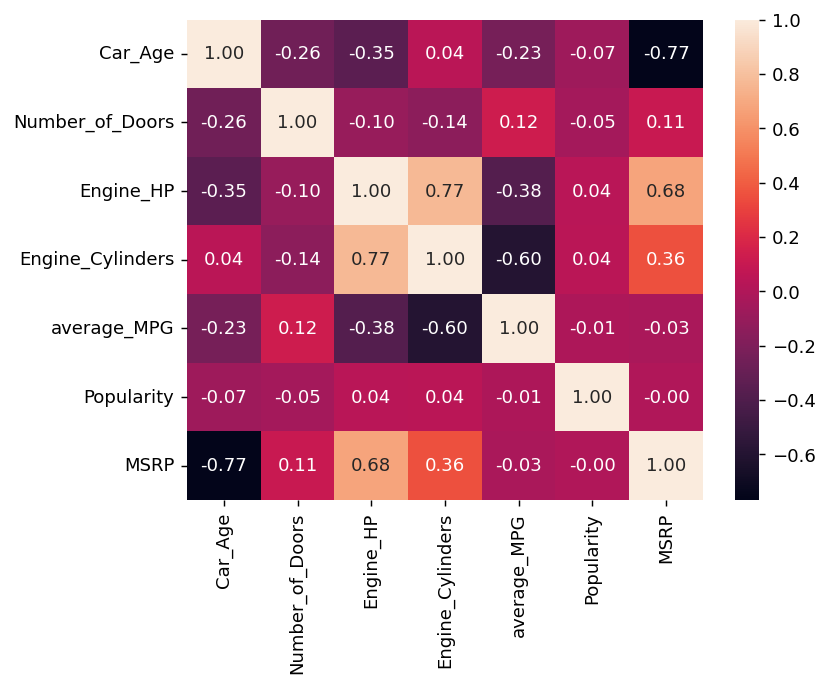

MSRP                1.000000
Engine_HP           0.676509
Engine_Cylinders    0.356533
Number_of_Doors     0.107847
Popularity         -0.000417
average_MPG        -0.027774
Car_Age            -0.768146
Name: MSRP, dtype: float64

In [6]:
#Create correlation matrix to vizualize and identify strong correlations
selected_columns = ["Car_Age", "Number_of_Doors", "Engine_HP", "Engine_Cylinders", "average_MPG", "Popularity", "MSRP"]
corr = df[selected_columns].corr()

#Plot heatmap
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

#Show actual values of correlation
corr["MSRP"].sort_values(ascending = False)

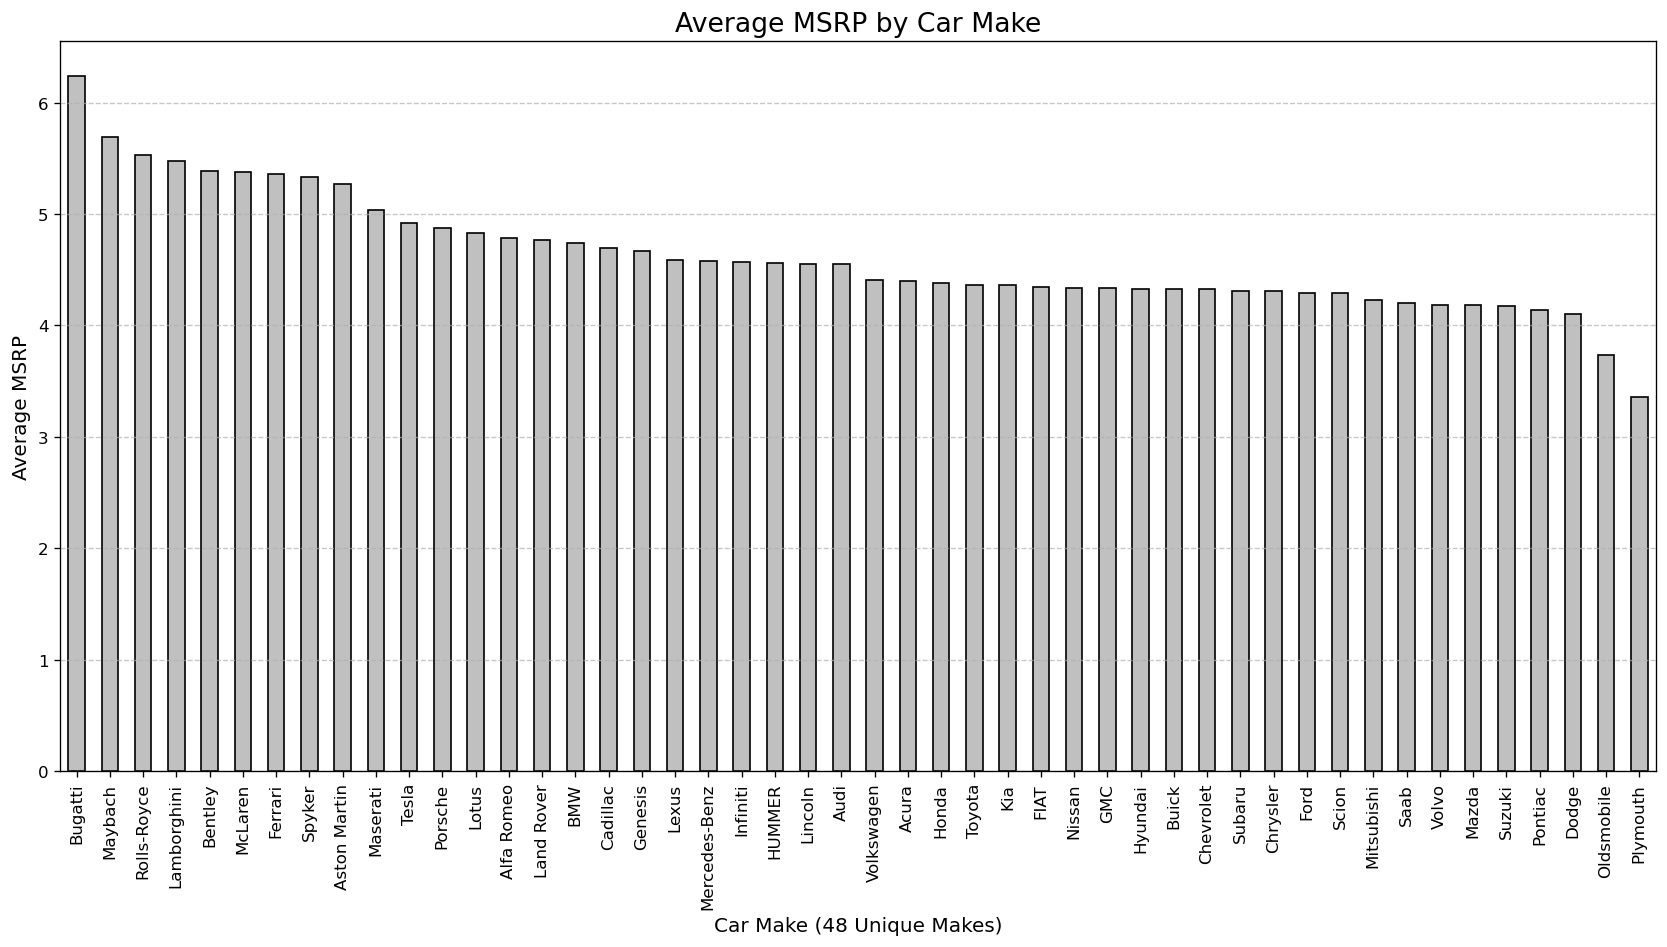

In [7]:
#Vizualize relationships between Make and MSRP

#Use groupby function and group by 'Make' and calculate the average MSRP
avg_msrp_by_make = df.groupby("Make")["MSRP"].mean().sort_values(ascending=False)

#Plot the average MSRP by car make
plt.figure(figsize=(14, 8), dpi=120)
avg_msrp_by_make.plot(kind="bar", color="silver", edgecolor="black")
plt.title("Average MSRP by Car Make", fontsize=16)
plt.xlabel("Car Make (48 Unique Makes)", fontsize=12)
plt.ylabel("Average MSRP", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

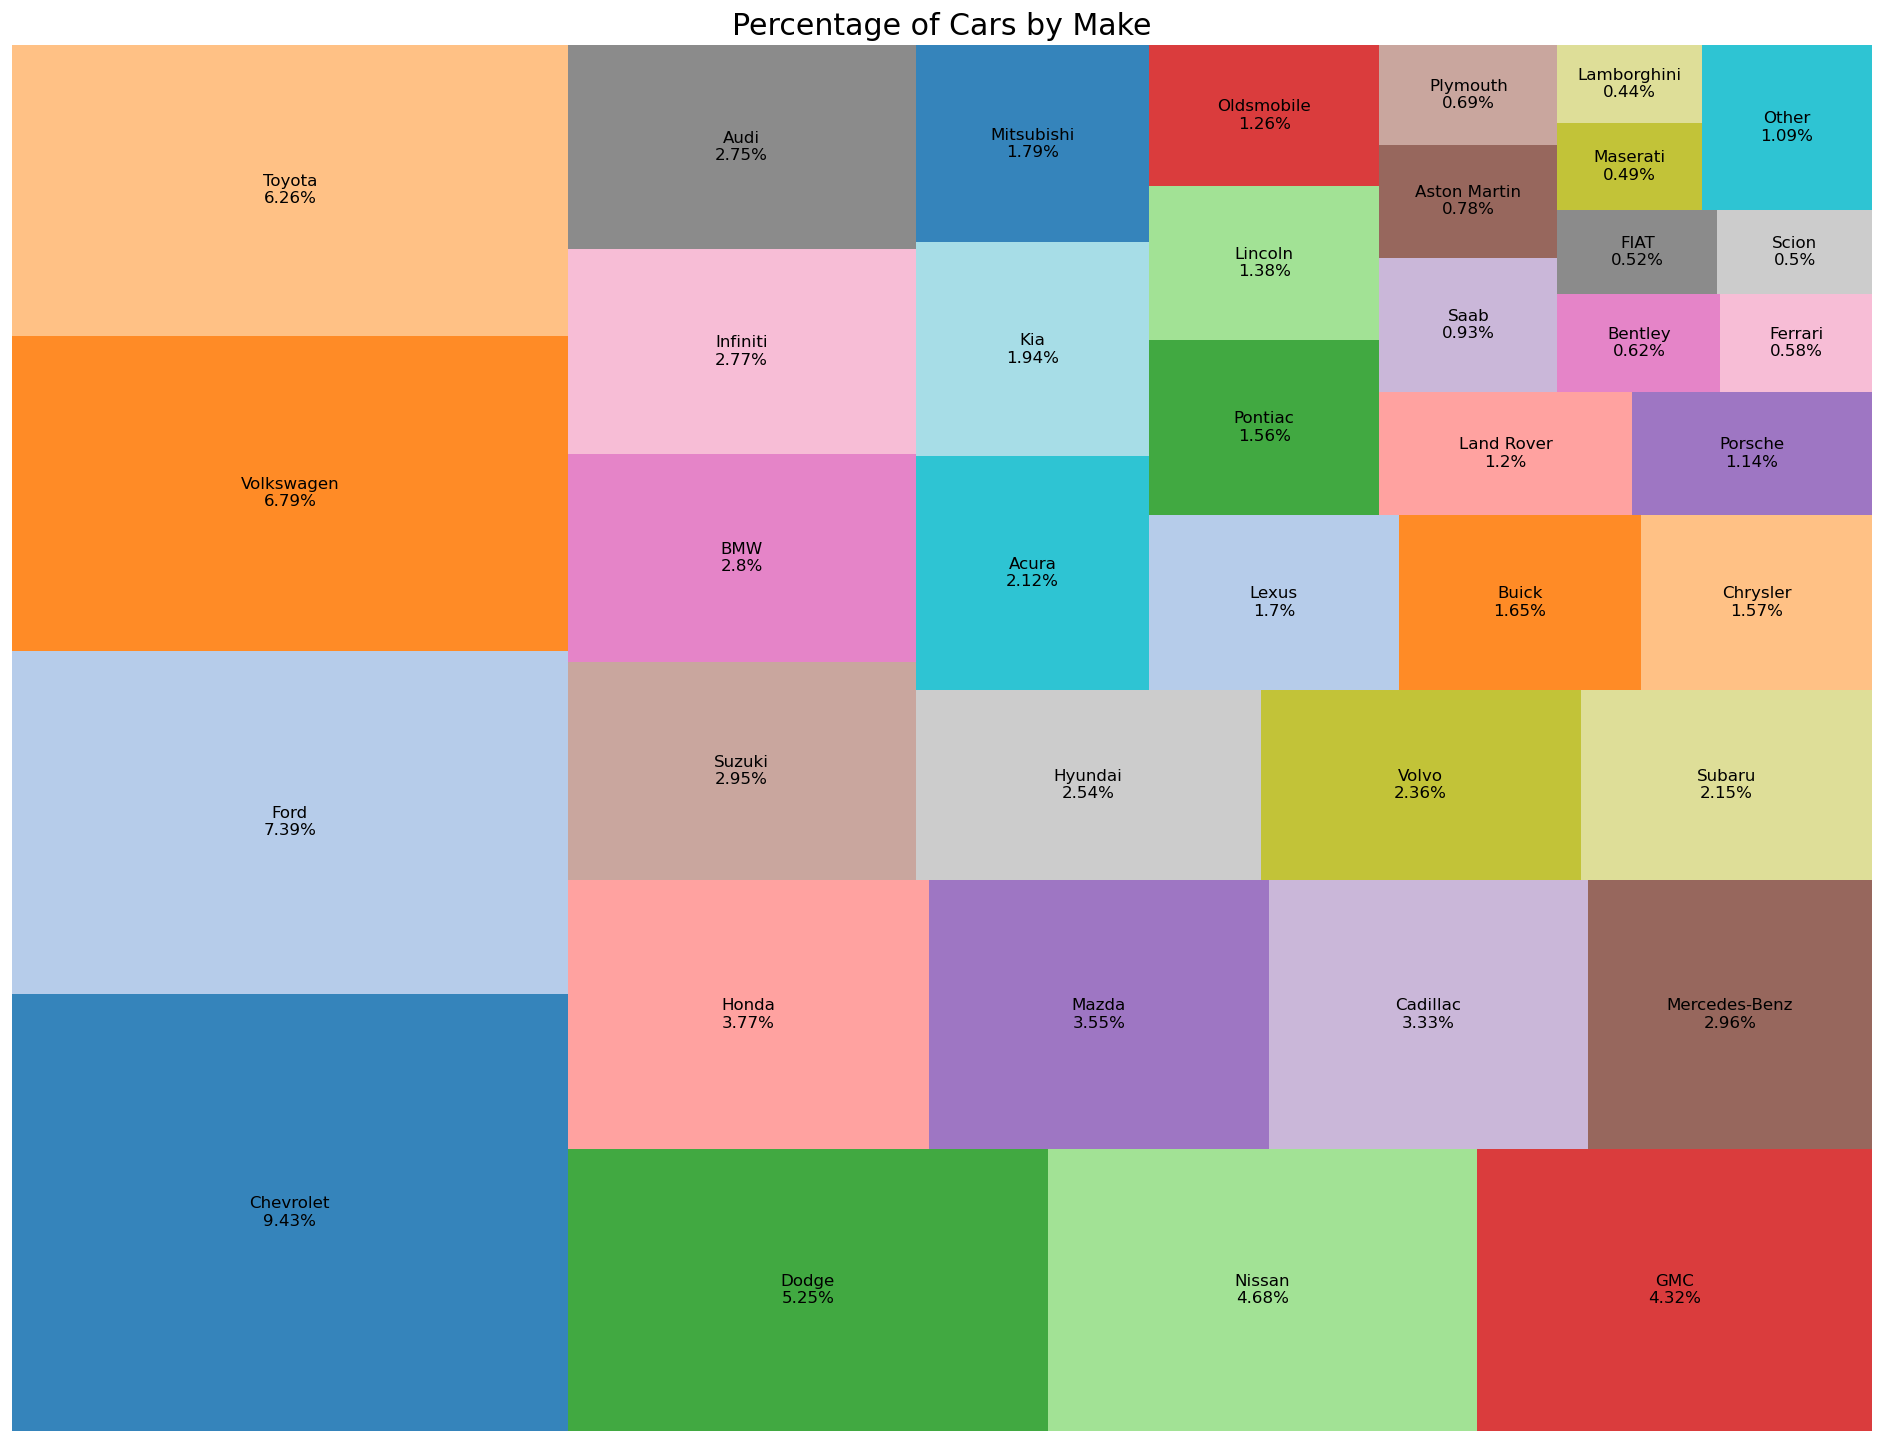

In [8]:
#Visualize different Makes in the dataset by percentages

#Use groupby function and calculate percentages
car_count_by_make = df["Make"].value_counts()
car_percentage_by_make = (car_count_by_make / car_count_by_make.sum()) * 100

#Convert to a DataFrame
car_percentage_by_make_df = car_percentage_by_make.reset_index()
car_percentage_by_make_df.columns = ['Make', 'Percentage']

#Prepare data for the treemap
car_percentage_by_make_df.sort_values(by="Percentage", ascending=False, inplace=True)

#Combine the smallest 10 categories into new category "Other"
smallest_10 = car_percentage_by_make_df.tail(10)  # Get the smallest 10
remaining_categories = car_percentage_by_make_df.iloc[:-10]  # All except the smallest 10

#Create the "Other" row
other_row = pd.DataFrame({
    "Make": ["Other"],
    "Percentage": [smallest_10["Percentage"].sum()]
})

#Combine the remaining categories with "Other"
car_percentage_by_make_df = pd.concat([remaining_categories, other_row], ignore_index=True)

#Create the treemap
plt.figure(figsize=(20, 15), dpi=120)
squarify.plot(
    sizes=car_percentage_by_make_df["Percentage"], 
    label=car_percentage_by_make_df["Make"] + '\n' + car_percentage_by_make_df["Percentage"].round(2).astype(str) + '%',
    color=plt.cm.tab20.colors,
    alpha=0.9
)
plt.title("Percentage of Cars by Make", fontsize=18)
plt.axis('off')  
plt.show()

#From this chart we can see that majority of the vehicles in this dataset are made by Chevrolet, Ford, Volkswagon, and Toyota

In [9]:
#A more detailed visualization of Makes in the dataset by percentage

#Ensure the Percentage column is numeric
car_percentage_by_make_df["Percentage"] = pd.to_numeric(car_percentage_by_make_df["Percentage"], errors="coerce")

#Format the percentage column for hover data
car_percentage_by_make_df["Percentage_of_Total"] = car_percentage_by_make_df["Percentage"].round(2).astype(str) + "%"

#Create an interactive treemap
fig = px.treemap(
    car_percentage_by_make_df, 
    path=["Make"], 
    values="Percentage",  # This controls the area of the rectangles
    title="Percentage of Cars by Make",
    color="Percentage",  # Colors based on percentage
    color_continuous_scale="reds",
    hover_data={
        "Percentage": False,  # Hide raw percentage
        "Percentage_of_Total": True  # Show formatted percentage
    }
)

#Show the plot
fig.show()


#This chart adds more detail to the different Make categories and allows for more interaction

<Figure size 1200x720 with 0 Axes>

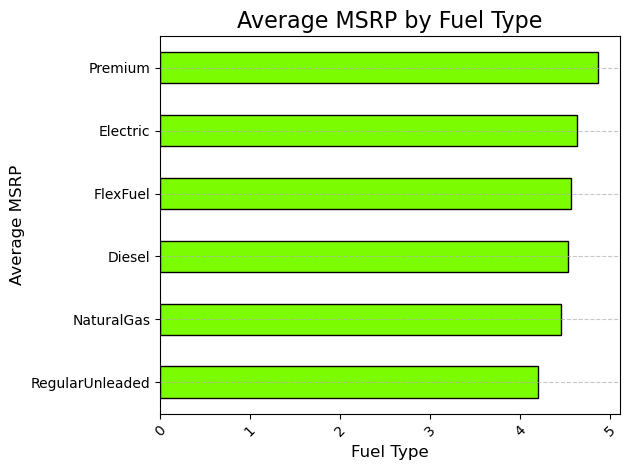

In [10]:
#Visualize relationships between Fuel Type and MSRP

#Group columns for the fuel types
fuel_type_columns = [
    "Fuel_Type_RegularUnleaded",
    "Fuel_Type_Premium",
    "Fuel_Type_FlexFuel",
    "Fuel_Type_Diesel",
    "Fuel_Type_NaturalGas",
    "Fuel_Type_Electric"
]

#Calculate the average MSRP for each fuel type
fuel_type_avg_msrp = {
    fuel_type: df[df[fuel_type] == 1]["MSRP"].mean()
    for fuel_type in fuel_type_columns
}

#Convert the dictionary to a DataFrame for easier plotting
fuel_type_avg_msrp_df = pd.DataFrame.from_dict(fuel_type_avg_msrp, orient='index', columns=['Average MSRP'])
fuel_type_avg_msrp_df.index = fuel_type_avg_msrp_df.index.str.replace('Fuel_Type_', '')


#Plot bar chart figure
plt.figure(figsize=(10, 6), dpi=120)
fuel_type_avg_msrp_df.sort_values(by="Average MSRP", ascending=True).plot(
    kind="barh", color='lawngreen', edgecolor="black", legend=False
)
plt.title("Average MSRP by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Average MSRP", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#From this chart we can see that cars that use the Premium fuel type are more expensive than the rest

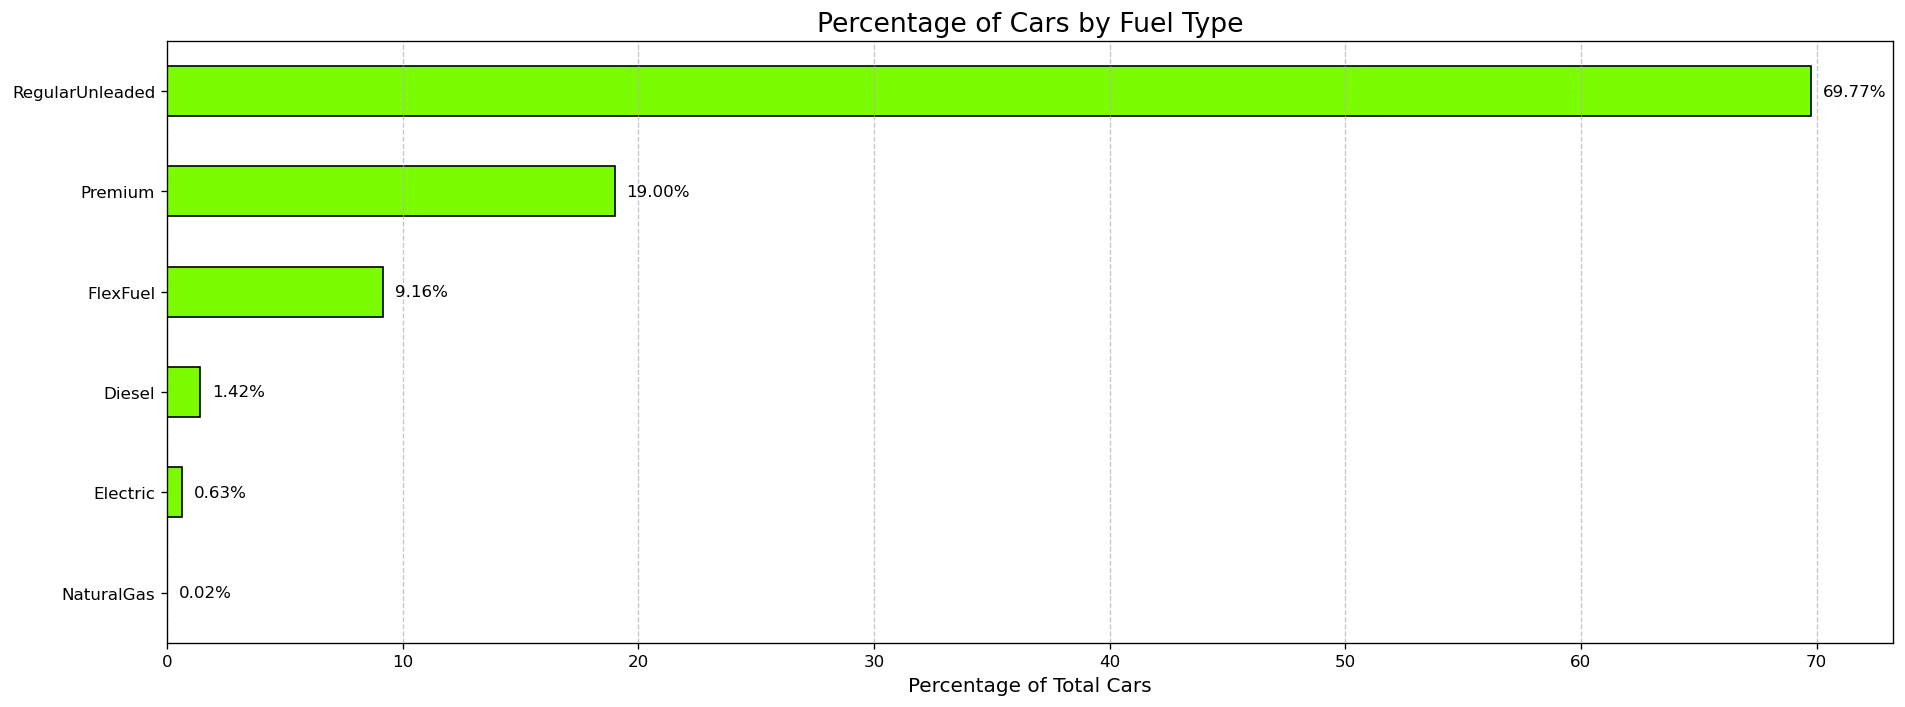

In [11]:
#Group columns for the fuel types
fuel_type_columns = [
    "Fuel_Type_RegularUnleaded",
    "Fuel_Type_Premium",
    "Fuel_Type_FlexFuel",
    "Fuel_Type_Diesel",
    "Fuel_Type_NaturalGas",
    "Fuel_Type_Electric"
]

#Calculate the total number of cars for each fuel type
fuel_type_counts = {
    fuel_type: df[fuel_type].sum()
    for fuel_type in fuel_type_columns
}

#Convert the dictionary to a DataFrame and remove Fuel Type prefix for easier plotting
fuel_type_counts_df = pd.DataFrame.from_dict(fuel_type_counts, orient='index', columns=['Count'])
fuel_type_counts_df.index = fuel_type_counts_df.index.str.replace('Fuel_Type_', '')

#Calculate percentages
fuel_type_counts_df['Percentage'] = (fuel_type_counts_df['Count'] / fuel_type_counts_df['Count'].sum()) * 100


#Plot bar chart
plt.figure(figsize=(16, 6), dpi=120)
ax = fuel_type_counts_df.sort_values(by="Percentage", ascending=True)['Percentage'].plot(
    kind="barh", color='lawngreen', edgecolor="black", legend=False
)

#Add labels to the bars
for index, value in enumerate(fuel_type_counts_df.sort_values(by="Percentage", ascending=True)['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

#Title and labels
plt.title("Percentage of Cars by Fuel Type", fontsize=16)
plt.xlabel("Percentage of Total Cars", fontsize=12)
plt.ylabel("")  
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#From this chart we can see that the majority of vehicles in this dataset use Regular fuel

<Figure size 1440x1200 with 0 Axes>

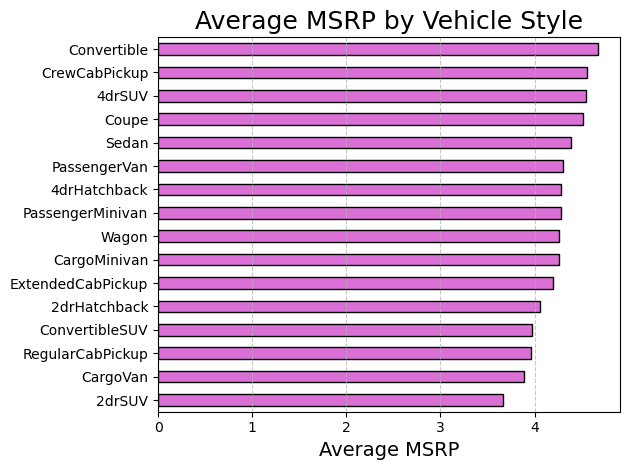

In [12]:
#Visualize relationships between Vehicle Style and MSRP

#Group columns for the vehicle styles
vehicle_style_columns = [
    "VehicleStyle_Coupe",
    "VehicleStyle_Convertible",
    "VehicleStyle_Sedan",
    "VehicleStyle_Wagon",
    "VehicleStyle_4drHatchback",
    "VehicleStyle_2drHatchback",
    "VehicleStyle_4drSUV",
    "VehicleStyle_PassengerMinivan",
    "VehicleStyle_CargoMinivan",
    "VehicleStyle_CrewCabPickup",
    "VehicleStyle_RegularCabPickup",
    "VehicleStyle_ExtendedCabPickup",
    "VehicleStyle_2drSUV",
    "VehicleStyle_CargoVan",
    "VehicleStyle_ConvertibleSUV",
    "VehicleStyle_PassengerVan"
]

#Calculate the average MSRP for each vehicle style
vehicle_style_avg_msrp = {
    vehicle_style: df[df[vehicle_style] == 1]["MSRP"].mean()
    for vehicle_style in vehicle_style_columns
}

#Convert the dictionary to a DataFrame for easier plotting
vehicle_style_avg_msrp_df = pd.DataFrame.from_dict(vehicle_style_avg_msrp, orient='index', columns=['Average MSRP'])
vehicle_style_avg_msrp_df.index = vehicle_style_avg_msrp_df.index.str.replace('VehicleStyle_', '')

#Plot bar chart figure
plt.figure(figsize=(12, 10), dpi=120)
ax = vehicle_style_avg_msrp_df.sort_values(by="Average MSRP", ascending=True).plot(
    kind="barh", color='orchid', edgecolor="black", legend=False
)

#Title and labels
plt.title("Average MSRP by Vehicle Style", fontsize=18)
plt.xlabel("Average MSRP", fontsize=14)
plt.ylabel("")  # Remove y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#From this chart we can see that on average, Convertible and Coupe vehicles have a higher MSRP

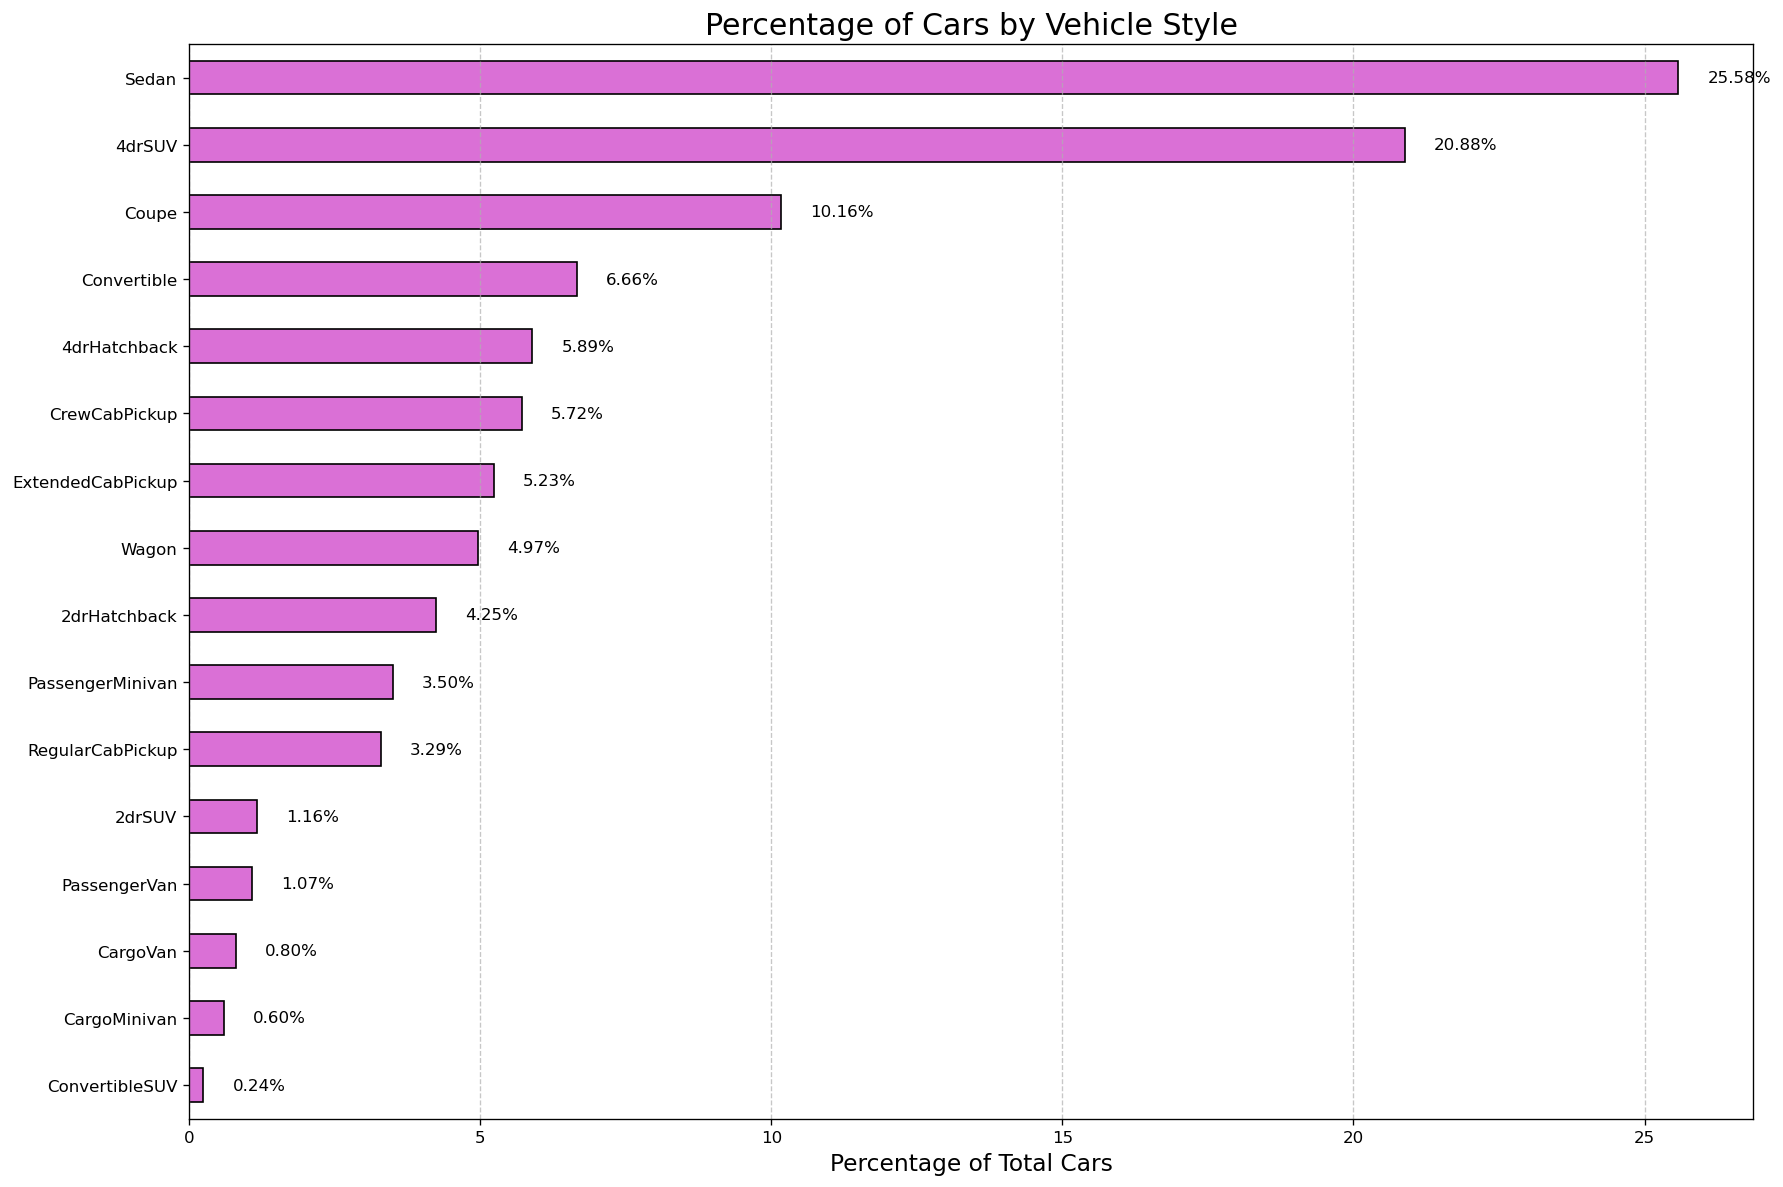

In [13]:
# Group columns for the vehicle styles
vehicle_style_columns = [
    "VehicleStyle_Coupe",
    "VehicleStyle_Convertible",
    "VehicleStyle_Sedan",
    "VehicleStyle_Wagon",
    "VehicleStyle_4drHatchback",
    "VehicleStyle_2drHatchback",
    "VehicleStyle_4drSUV",
    "VehicleStyle_PassengerMinivan",
    "VehicleStyle_CargoMinivan",
    "VehicleStyle_CrewCabPickup",
    "VehicleStyle_RegularCabPickup",
    "VehicleStyle_ExtendedCabPickup",
    "VehicleStyle_2drSUV",
    "VehicleStyle_CargoVan",
    "VehicleStyle_ConvertibleSUV",
    "VehicleStyle_PassengerVan"
]

#Calculate the total number of cars for each style
vehicle_style_counts = {
    vehicle_style: df[vehicle_style].sum()
    for vehicle_style in vehicle_style_columns
}

#Convert the dictionary to a DataFrame and remove VehicleStyle prefix for easier plotting
vehicle_style_counts_df = pd.DataFrame.from_dict(vehicle_style_counts, orient='index', columns=['Count'])
vehicle_style_counts_df.index = vehicle_style_counts_df.index.str.replace('VehicleStyle_', '')

#Calculate percentages
vehicle_style_counts_df['Percentage'] = (vehicle_style_counts_df['Count'] / vehicle_style_counts_df['Count'].sum()) * 100


#Plot bar chart
plt.figure(figsize=(15, 10), dpi=120)
ax = vehicle_style_counts_df.sort_values(by="Percentage", ascending=True)['Percentage'].plot(
    kind="barh", color='orchid', edgecolor="black", legend=False
)

#Add labels to the bars
for index, value in enumerate(vehicle_style_counts_df.sort_values(by="Percentage", ascending=True)['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

#Title and labels
plt.title("Percentage of Cars by Vehicle Style", fontsize=18)
plt.xlabel("Percentage of Total Cars", fontsize=14)
plt.ylabel("") 
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#From this chart we can see that most of the vehicles within the dataset can be classified as Sedans or 4 Door SUVs

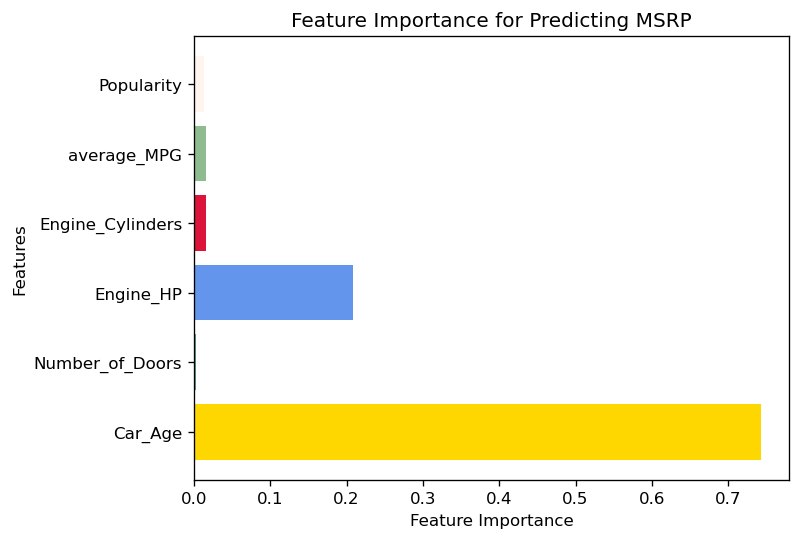

In [14]:
#Utilize a Random Forest Regressor to determine the features that impact MSRP the most

#Specify features and the target
features = ["Car_Age", "Number_of_Doors", "Engine_HP", "Engine_Cylinders", "average_MPG", "Popularity"]
target = "MSRP"

X = df[features]
y = df[target]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Retrieve feature importance
importances = model.feature_importances_

#Define colors for each bar
custom_colors = ['gold', 'cadetblue', 'cornflowerblue', 'crimson', 'darkseagreen', 'seashell']

#Visualize feature importance using boxplot
plt.figure(dpi=120)
plt.barh(features, importances, color=custom_colors)  # Specify custom colors
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting MSRP")
plt.show()

#From this we can see that age of the car is by far the most important feature, followed by horsepower

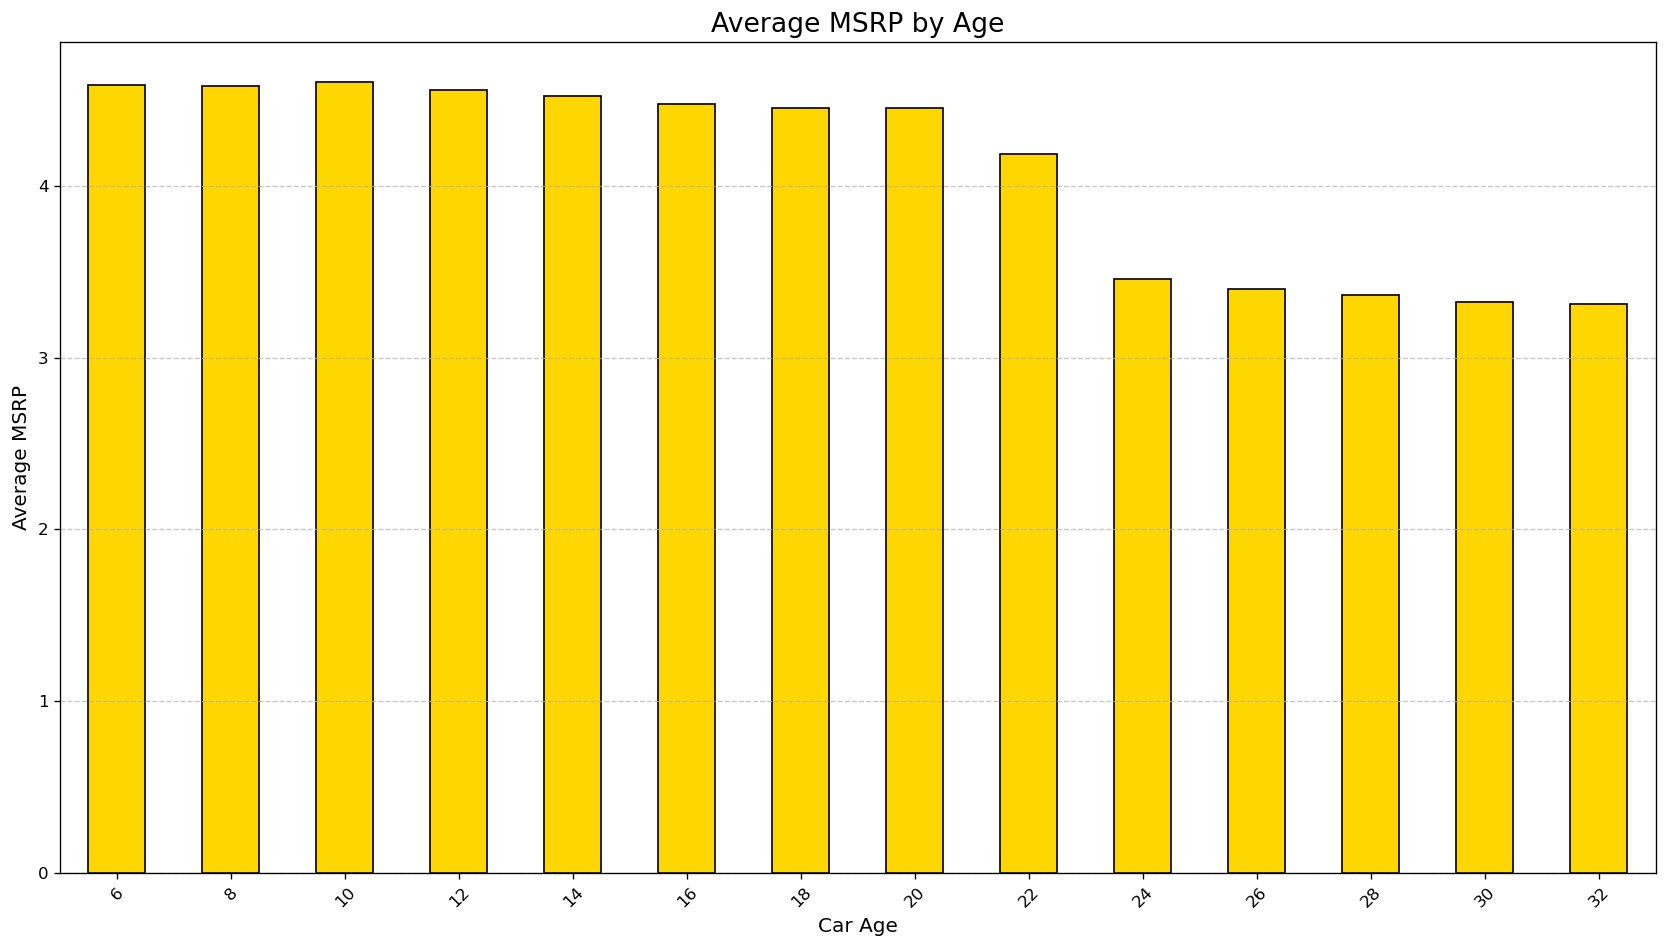

In [15]:
#Create plot to visualize the relationship between Car Age and MSRP

#Original MSRP Min and Max
##original_min_msrp = 3  
##original_max_msrp = 6 

#Unnormalize MSRP
##df['MSRP_Unnormalized'] = df['MSRP'] * (original_max_msrp - original_min_msrp) + original_min_msrp

#Original Age Min and Max
original_min_age = 7 
original_max_age = 34  

#Unnormalize Car_Age
df['Car_Age_Scaled'] = df['Car_Age'] * (original_max_age - original_min_age) + original_min_age

#Define the bin width and create bins for 'Car_Age_Scaled'
bin_width = 2
df['Age_Bins'] = (df['Car_Age_Scaled'] // bin_width * bin_width).astype(int)

#Use grouby function and group by the new bins and caulate the average MSRP
average_msrp_by_age_bins = df.groupby("Age_Bins")["MSRP"].mean()

# Plotting the average MSRP by binned car age
plt.figure(figsize=(14, 8), dpi=120)
average_msrp_by_age_bins.plot(kind="bar", color="gold", edgecolor="black")
plt.title("Average MSRP by Age", fontsize=16)
plt.xlabel("Car Age", fontsize=12)
plt.ylabel("Average MSRP", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#With this code it is possible to unnormalize the MSRP value, however the graph is much more representative of just how drastic of an effect Car Age has on MSRP

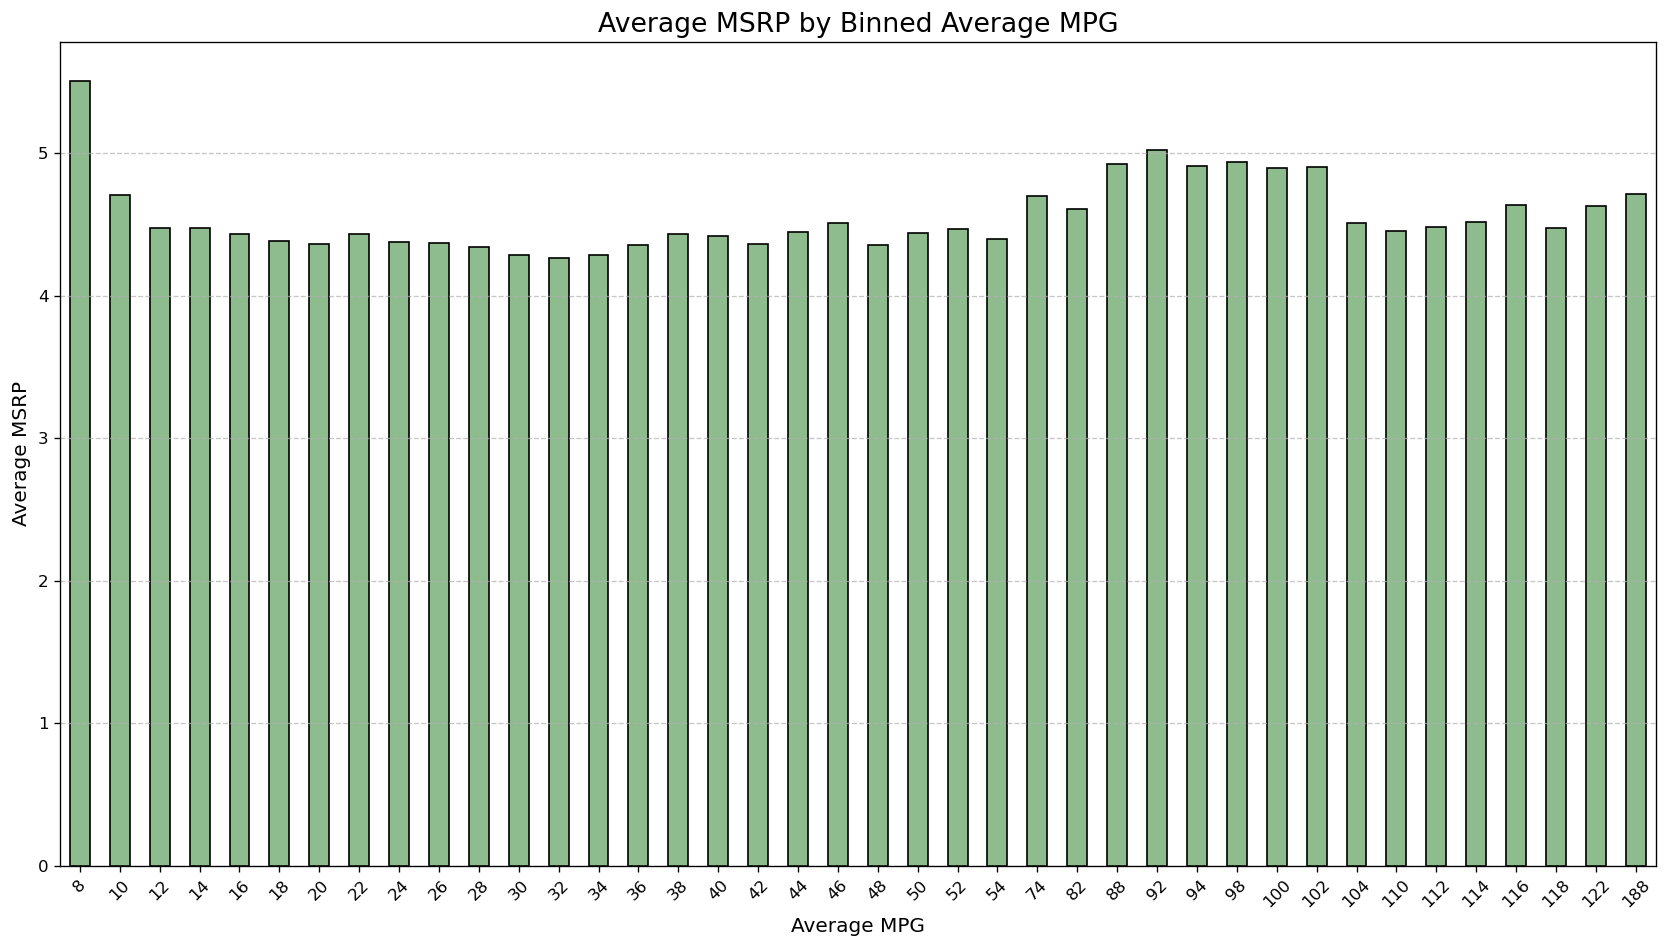

In [16]:
#Create plot to visualize the relationship between Average MPG and MSRP

#Original MSRP Min and Max
##original_min_msrp = 3  
##original_max_msrp = 6 

#Unnormalize MSRP
##df['MSRP_Unnormalized'] = df['MSRP'] * (original_max_msrp - original_min_msrp) + original_min_msrp

#Original Age Min and Max
original_min_age = 9 
original_max_age = 189  

#Unnormalize Car_Age
df['average_MPG_Scaled'] = df['average_MPG'] * (original_max_age - original_min_age) + original_min_age

#Define the bin width and create bins for 'average_MPG'
bin_width = 2
df['MPG_Bins'] = (df['average_MPG_Scaled'] // bin_width * bin_width).astype(int)

# Group by the new bins and calculate the average MSRP
average_msrp_by_mpg_bins = df.groupby("MPG_Bins")["MSRP"].mean()

# Plotting the average MSRP by binned average MPG
plt.figure(figsize=(14, 8), dpi=120)
average_msrp_by_mpg_bins.plot(kind="bar", color="darkseagreen", edgecolor="black")
plt.title("Average MSRP by Binned Average MPG", fontsize=16)
plt.xlabel("Average MPG", fontsize=12)
plt.ylabel("Average MSRP", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#From this graph we can see that the optimal MPG for higher MSRP is around 90-92 MPG, then the average at 8 MPG represents super performance cars which explains the jump in MSRP

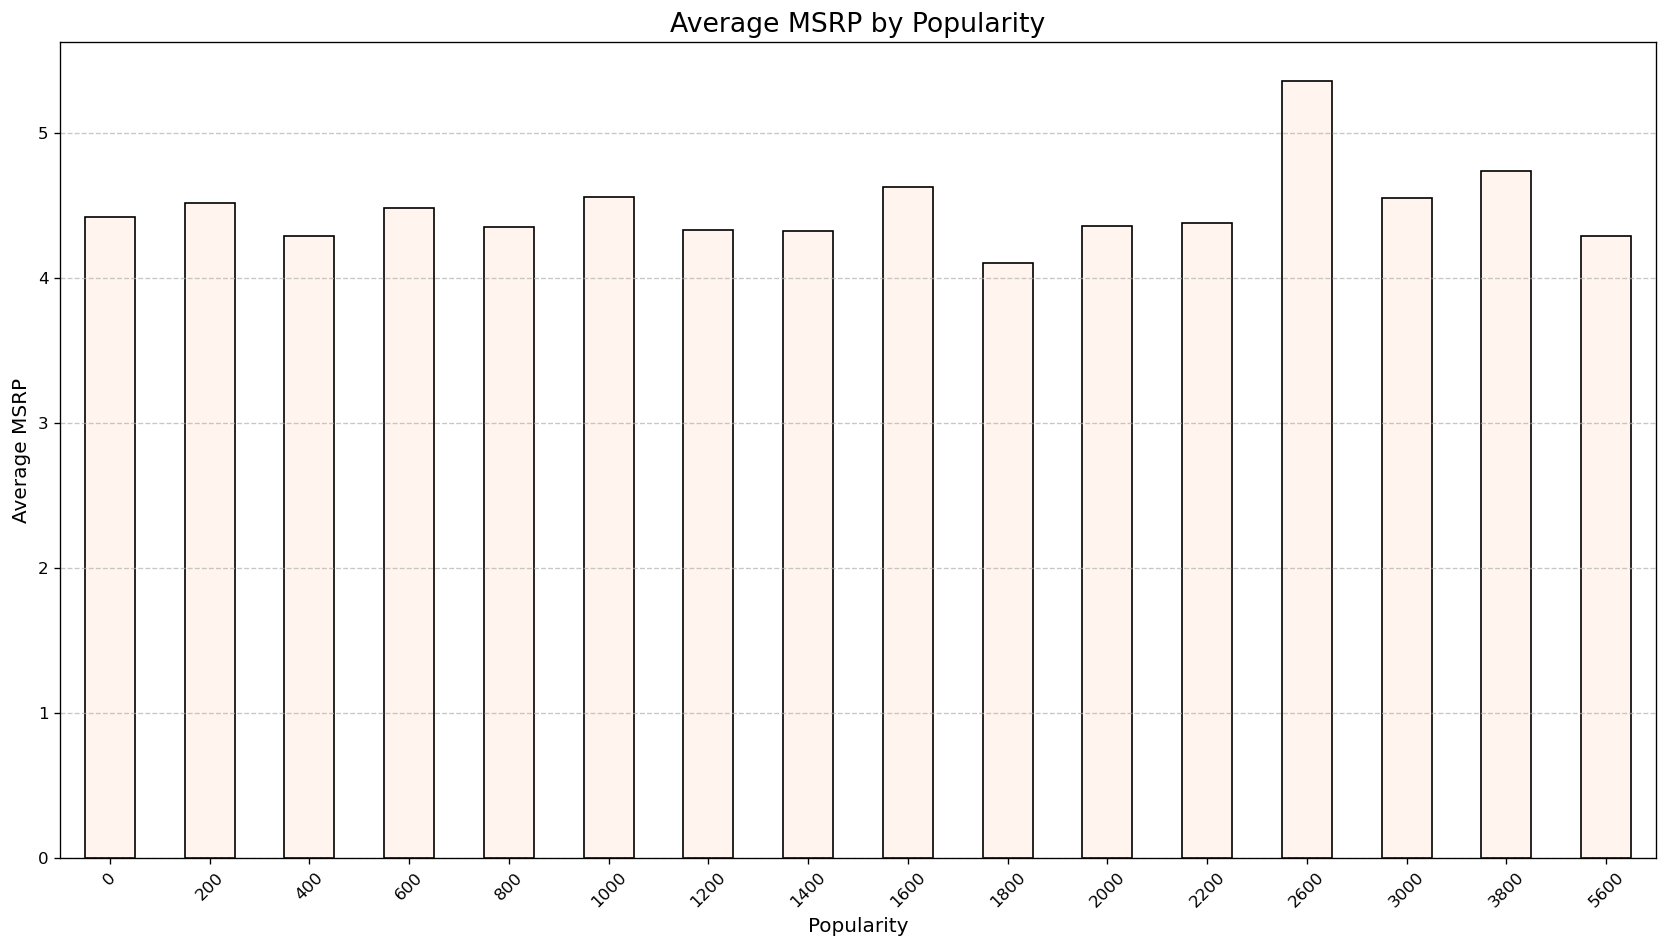

In [17]:
#Create plot to visualize the relationship between Popularity and MSRP

#Original MSRP Min and Max
##original_min_msrp = 3  
##original_max_msrp = 6 

#Unnormalize MSRP
##df['MSRP_Unnormalized'] = df['MSRP'] * (original_max_msrp - original_min_msrp) + original_min_msrp

#Original Age Min and Max
original_min_pop = 2 
original_max_pop = 5657  

#Unnormalize Car_Age
df['Popularity_Scaled'] = df['Popularity'] * (original_max_pop - original_min_pop) + original_min_pop

#Define the bin width and create bins for 'Car_Age_Scaled'
bin_width = 200
df['Pop_Bins'] = (df['Popularity_Scaled'] // bin_width * bin_width).astype(int)

#Use grouby function and group by the new bins and caulate the average MSRP
average_msrp_by_age_bins = df.groupby("Pop_Bins")["MSRP"].mean()

# Plotting the average MSRP by binned car age
plt.figure(figsize=(14, 8), dpi=120)
average_msrp_by_age_bins.plot(kind="bar", color="seashell", edgecolor="black")
plt.title("Average MSRP by Popularity", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Average MSRP", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#From this chart we can see that Popularity does not have a direct relationship so it should not be used when predicting MSRP

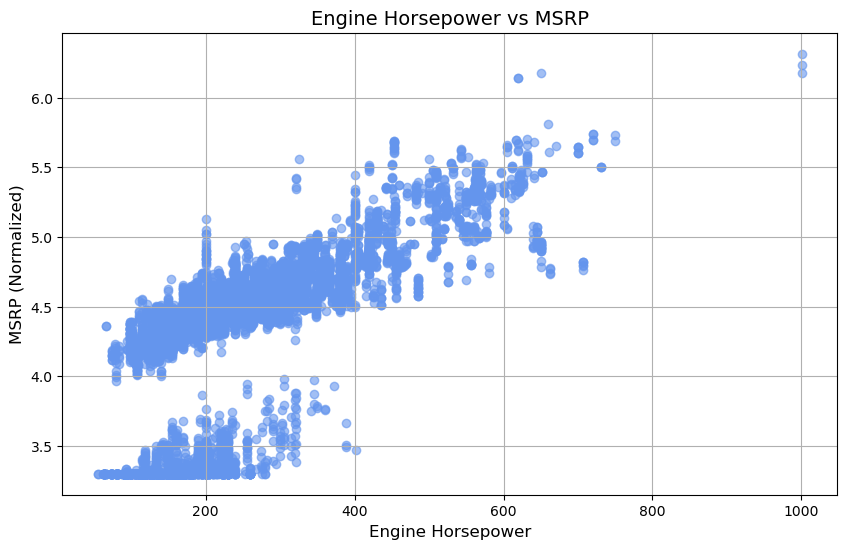

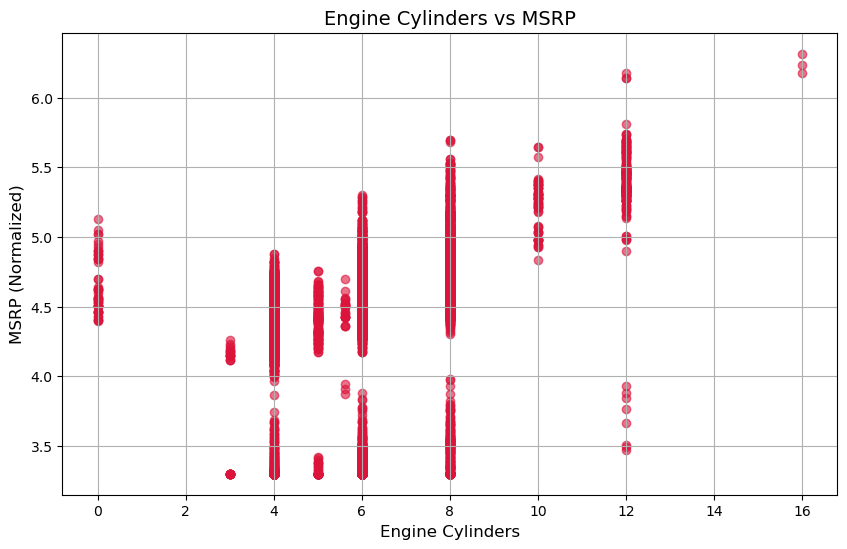

In [18]:
#Create scatter plots to show the relationships between Horsepower and Cylinder count with MSRP

from mpl_toolkits.mplot3d import Axes3D

#Original Engine_HP Min and Max
original_min_hp = 55 
original_max_hp = 1001  

#Unnormalize Engine_HP
df['Engine_HP_Scaled'] = df['Engine_HP'] * (original_max_hp - original_min_hp) + original_min_hp

#Scatter plot 1: Engine_HP vs. MSRP
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine_HP_Scaled'], df['MSRP'], color='cornflowerblue', alpha=0.6)
plt.title('Engine Horsepower vs MSRP', fontsize=14)
plt.xlabel('Engine Horsepower', fontsize=12)
plt.ylabel('MSRP (Normalized)', fontsize=12)
plt.grid(True)
plt.show()

#Original Engine_Cylinders Min and Max
original_min_cylinders =  0
original_max_cylinders =  16 

#Unnormalize Engine_Cylinders
df['Engine_Cylinders_Scaled'] = df['Engine_Cylinders'] * (original_max_cylinders - original_min_cylinders) + original_min_cylinders

#Scatter plot 2: Engine_Cylinders vs. MSRP
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine_Cylinders_Scaled'], df['MSRP'], color='crimson', alpha=0.6) 
plt.title('Engine Cylinders vs MSRP', fontsize=14)
plt.xlabel('Engine Cylinders', fontsize=12)
plt.ylabel('MSRP (Normalized)', fontsize=12)
plt.grid(True)
plt.show()

#From these charts we can visualize the spread of horsepower, cylinders, and how they affect MSRP. We can see that horse power and cylinders fall into specific groups with MSRP

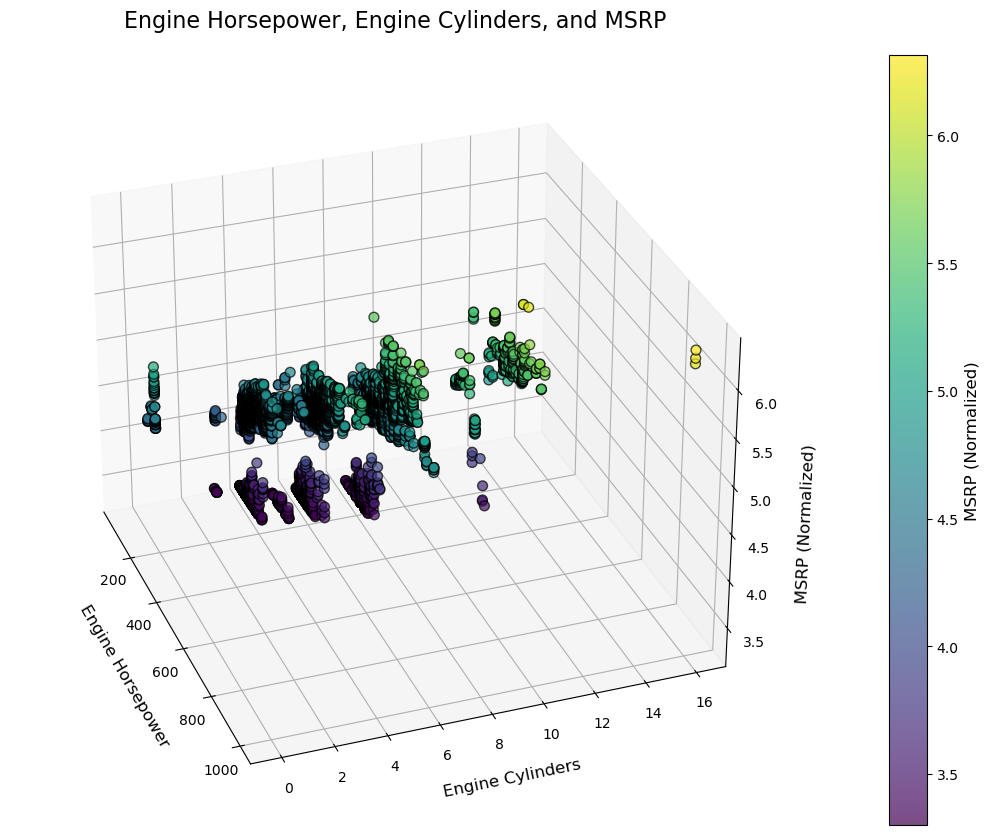

In [19]:
#Create a 3D scatter plot to visualize the relationship between Engine Horsepower, Engine Cylinders, and MSRP


#3D scatter plot: Both Engine_HP, Engine_Cylinders, and MSRP
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

#Scatter plot with color gradient based on MSRP
sc = ax.scatter(
    df['Engine_HP_Scaled'], 
    df['Engine_Cylinders_Scaled'], 
    df['MSRP'], 
    c=df['MSRP'], 
    cmap='viridis', 
    s=50, 
    alpha=0.7, 
    edgecolor='k'  
)

#Add a color bar to show change in MSRP
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('MSRP (Normalized)', fontsize=12)

#Set labels and title
ax.set_title('Engine Horsepower, Engine Cylinders, and MSRP', fontsize=16, pad=20)
ax.set_xlabel('Engine Horsepower', fontsize=12, labelpad=10)
ax.set_ylabel('Engine Cylinders', fontsize=12, labelpad=10)
ax.set_zlabel('MSRP (Normalized)', fontsize=12, labelpad=10)

#Add grid lines for orientation
ax.grid(True)

#Set a custom viewing angle
ax.view_init(elev=30, azim=340)

plt.show()

#From this chart we can see that on average, higher horespower and more cylinders will be associated with higher MSRP, with horsepower having a stronger relationship